In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df= pd.read_csv(r"C:\Users\burha\Downloads\height-weight.csv")

In [93]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


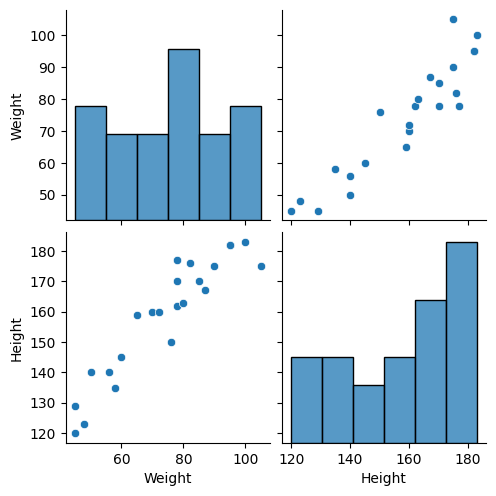

In [94]:
sns.pairplot(df)

<Axes: >

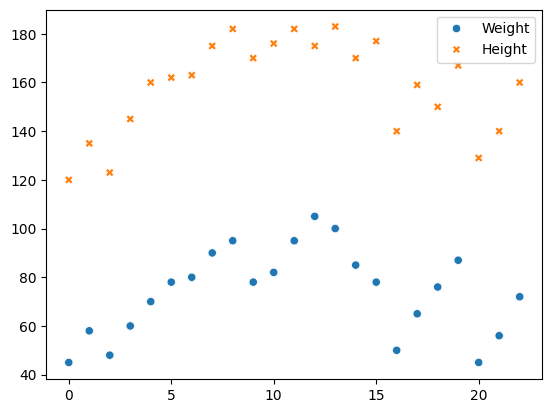

In [95]:
sns.scatterplot(df)

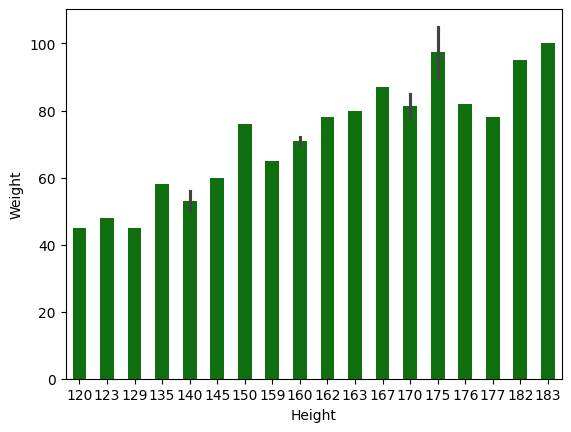

In [96]:
sns.barplot(x='Height', y='Weight', data=df, color='green', width=0.5)
plt.show()


In [97]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [98]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


SIMPLE LINEAR REGRESSION

In [99]:
X=df[['Weight']]  ### indepedent features in 2d
y=df['Height']  # dependent feature in 1 d/ series

TRAIN - TEST SPLIT DATA

In [100]:
from sklearn.model_selection  import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

STANDARDIZATION

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test=scaler.transform(X_test)

ML ALOG

In [104]:
from sklearn.linear_model import LinearRegression
## first of all initialise the object
regression = LinearRegression(n_jobs=1)

In [105]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [106]:
print("coefficients/slope:", regression.coef_)

coefficients/slope: [17.2982057]


In [107]:
print("Intercept :",regression.intercept_)

Intercept : 156.47058823529412


PLOT TRAIN AND BEST FIT LINE

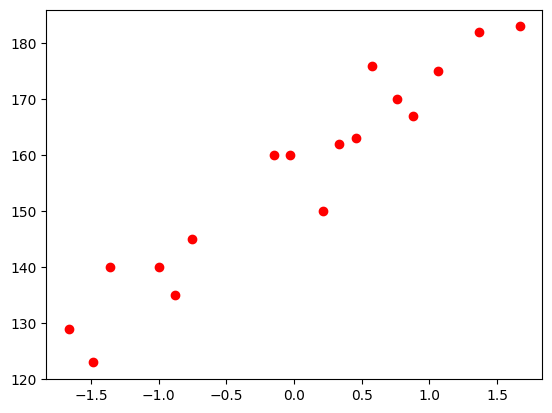

In [114]:
plt.scatter(X_train,y_train,color='red')

Text(0, 0.5, 'Height')

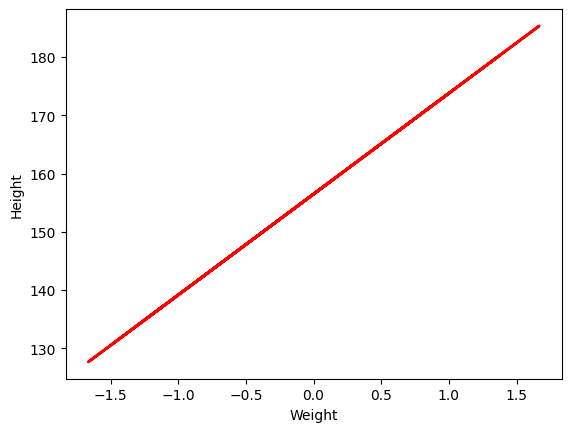

In [122]:
plt.plot (X_train, regression.predict(X_train),color='red',linewidth=2)
plt.xlabel("Weight")
plt.ylabel("Height")

PREDICTION FOR TEST DATA

In [123]:
y_predicted= regression.predict(X_test)

In [126]:
y_pred_test= regression.intercept_ + regression.coef_*(X_test)

In [130]:
y_pred_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})

In [131]:
y_pred_test

,Actual,Predicted
15,177,162.264997
9,170,162.264997
0,120,127.683471
8,182,180.079723
17,159,148.641972
12,175,190.558973


PERFROMANCE METRICS

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2= r2_score(y_test,y_predicted)

In [139]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)
print("r2:",r2)

mse: 114.84069295228699
mae: 9.66512588679501
rmse: 10.716374991212605
r2: 0.7360826717981276


ADUSTED R SQUARED

In [140]:
adj_r_squared = 1- (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [141]:
adj_r_squared

0.6701033397476595

WITH OLS LINEAR REGRESSION

In [143]:
import statsmodels.api as sum
model = sum.OLS(y_train,X_train).fit()

In [147]:
pred = model.predict(X_test)
print(pred)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [148]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 19 Aug 2025   Prob (F-statistic):                       0.664
Time:                        18:39:47   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\burha\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


PREDICTION FOR SOME WEIGHT

In [157]:
regression.predict(scaler.transform([[72]]))

C:\Users\burha\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])